In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [7]:
train_data = train_datagen.flow_from_directory(
    r'C:\Users\nanda\Desktop\tf-fashion-mnist\dataset-cvd\train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_data = validation_datagen.flow_from_directory(
    r'C:\Users\nanda\Desktop\tf-fashion-mnist\dataset-cvd\validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 24959 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
epochs = 20

history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=epochs
)

Epoch 1/20
  5/780 [..............................] - ETA: 8:34 - loss: 0.7887 - accuracy: 0.5188

C:\Users\nanda\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:864: UserWarning: Truncated File Read
  warnings.warn(str(msg))


780/780 [==============================] - 538s 689ms/step - loss: 0.6855 - accuracy: 0.5471 - val_loss: 0.6535 - val_accuracy: 0.6071
Epoch 2/20
780/780 [==============================] - 536s 687ms/step - loss: 0.6262 - accuracy: 0.6466 - val_loss: 0.5532 - val_accuracy: 0.7122
Epoch 3/20
780/780 [==============================] - 534s 684ms/step - loss: 0.5548 - accuracy: 0.7141 - val_loss: 0.4802 - val_accuracy: 0.7729
Epoch 4/20
780/780 [==============================] - 534s 684ms/step - loss: 0.5118 - accuracy: 0.7485 - val_loss: 0.4176 - val_accuracy: 0.8080
Epoch 5/20
780/780 [==============================] - 535s 686ms/step - loss: 0.4526 - accuracy: 0.7878 - val_loss: 0.3776 - val_accuracy: 0.8314
Epoch 6/20
780/780 [==============================] - 536s 687ms/step - loss: 0.4076 - accuracy: 0.8141 - val_loss: 0.3094 - val_accuracy: 0.8618
Epoch 7/20
780/780 [==============================] - 535s 686ms/step - loss: 0.3648 - accuracy: 0.8376 - val_loss: 0.3058 - val_accura

Num GPUs Available:  0


In [15]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_data = test_datagen.flow_from_directory(
    r'C:\Users\nanda\Desktop\tf-fashion-mnist\dataset-cvd\test',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy*100}%")

Found 2023 images belonging to 2 classes.
64/64 [==============================] - 8s 126ms/step - loss: 0.1721 - accuracy: 0.9278
Test Accuracy: 92.78299808502197%


1/1 [==============================] - 0s 23ms/step
Its dog


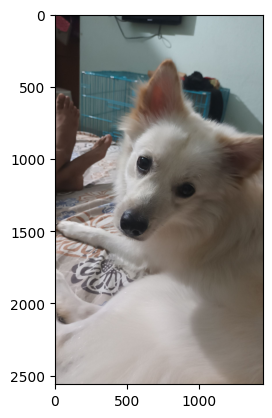

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as imgg
new_path_image = r'C:\Users\nanda\Desktop\tf-fashion-mnist\photo_2023-04-26_22-26-09.jpg'
test_image = imgg.imread(r'C:\Users\nanda\Desktop\tf-fashion-mnist\photo_2023-04-26_22-26-09.jpg')
plt.imshow(test_image)

img = keras.preprocessing.image.load_img(new_path_image, target_size=(150,150))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
if predictions[0]>0.5:
    print("Its dog")
else:
    print("its cat")

In [22]:
model.save('cats_vs_dogs_model.h5')

In [23]:
model.save('cats_vs_dogs_model')

INFO:tensorflow:Assets written to: cats_vs_dogs_model\assets


INFO:tensorflow:Assets written to: cats_vs_dogs_model\assets
